In [ ]:
!pip install scikit-learn matplotlib kmodes

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data # Features: Sepal length, Sepal width, Petal length, Petal width


In [ ]:
# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
# Get the cluster labels
labels = kmeans.labels_

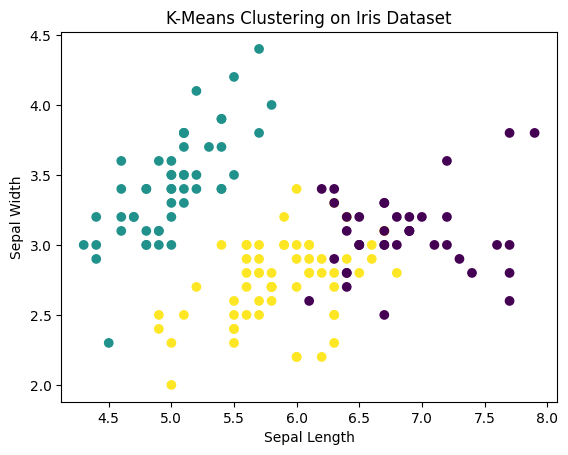

Cluster centers (centroids):
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [ ]:
# Visualize the K-Means clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
# Print the cluster centers (centroids)
print("Cluster centers (centroids):\n", kmeans.cluster_centers_)

In [ ]:
# Load Titanic dataset from a URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data.head()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Select categorical columns for clustering
categorical_data = data[['Sex', 'Embarked', 'Pclass']]
# Encode categorical data as numeric codes
categorical_data = categorical_data.apply(lambda col: col.astype('category').cat.codes)
# Apply K-Modes clustering with 3 clusters
kmodes = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(categorical_data) # Fit the model and get cluster assignments
data['Cluster'] = clusters # Add the cluster assignments to the DataFrame

print(data[['Sex', 'Embarked', 'Pclass', 'Cluster']].head())
print("Cluster centers (modes):\n", kmodes.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 84, cost: 644.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 623.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 170, cost: 561.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 509.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 183, cost: 577.0
Best run was number 4
      Sex Embarked  Pclass  Cluster
0    male        S       3        2
1  female        C       1        1
2  female        S       3        0
3  female        S       1        0
4    male        S       3        2
Cluster centers (modes):
 [[0 2 2]
 [1 0 0]
 [1 2 2]]
